In [18]:
import pandas as pd
import numpy as np
churn_data = pd.read_csv('data/churn.csv')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

Столбцы таблицы:

* *RowNumber* — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* *CustomerId* — идентификатор клиента
* *Surname* — фамилия клиента
* *CreditScore* — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* *Geography* — страна клиента (банк международный)
* *Gender* — пол клиента
* *Age* — возраст клиента
* *Tenure* — сколько лет клиент пользуется услугами банка
* *Balance* — баланс на счетах клиента в банке
* *NumOfProducts* — количество услуг банка, которые приобрёл клиент
* *HasCrCard* — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* *IsActiveMember* — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* *EstimatedSalary* — предполагаемая заработная плата клиента
* *Exited* — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

-----------
-  [схема выбора графика](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/9b4a1307977d419f96329d97261bcfde#visual-scheme)

In [3]:
churn_df = churn_data.copy()
churn_df = churn_df.drop('RowNumber', axis=1)

### Задание 9.1. 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

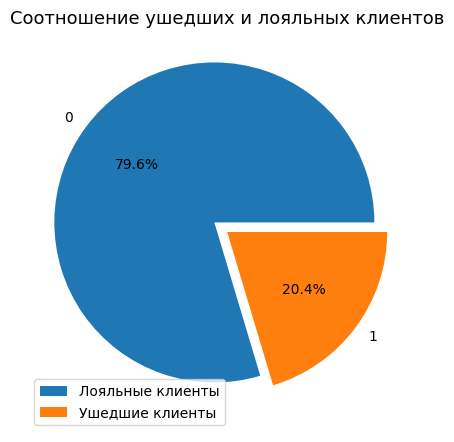

In [4]:
exited_clients = churn_df['Exited'].value_counts()

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_clients,
    labels=exited_clients.index,
    autopct='%.1f%%',
    explode=[0.1,0]        
);
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=13)
axes.legend(['Лояльные клиенты', 'Ушедшие клиенты']);


#### Description
Из графика видно, что соотношение лояльных и ушедших клиентов 4:1.    
20% всех клиентов ушли из банка.

### Задание 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

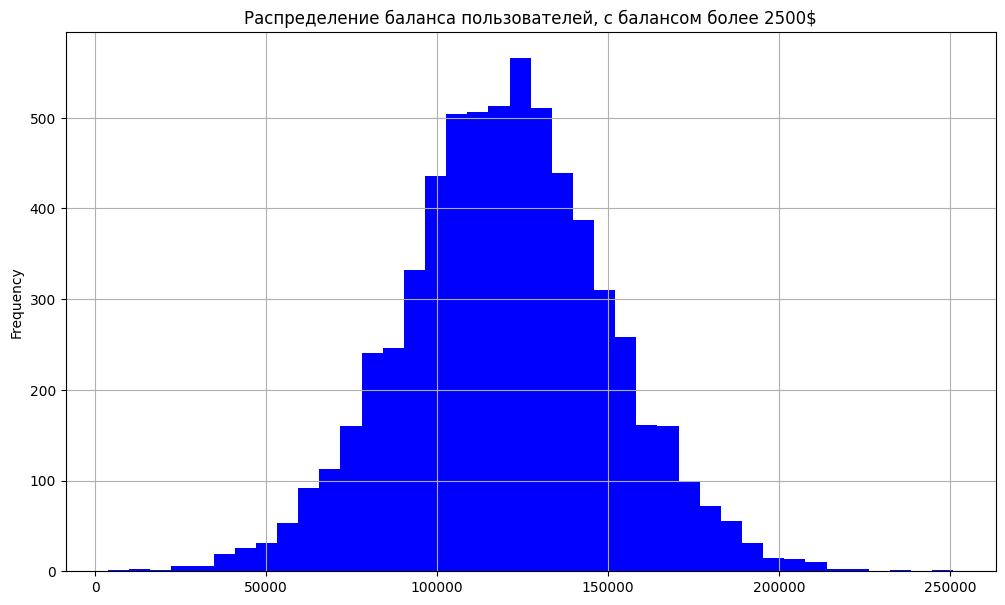

In [5]:
balance_more_2500 = churn_df[churn_df['Balance'] > 2500]

balance_more_2500['Balance'].plot(
    kind='hist',
    figsize=(12, 7),
    title='Распределение баланса пользователей, с балансом более 2500$',
    grid=True,
    color='blue',
    bins=40
);

#### Description
На кграфике видно нормальное распределение.   
Средний баланс клиентов (с болансом более 2500$ на счету) 125 000$

### Задание 9.3.
 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [6]:

churn_df['Label'] = churn_data['Exited'].replace({1: 'Ушедшие', 0: 'Лояльные'})

fig = px.histogram(
    churn_df,
    x='Balance',
    color='Label',
    nbins=20,
    title='Распределение баланса клиентов по оттоку',
    histnorm='percent',
    color_discrete_sequence=['red', 'blue'],
    opacity=0.6,
    height=500,
    width=1000
)

fig.update_xaxes(title_text='Баланс')
fig.update_yaxes(title_text='Количество клиентов')

fig.show()

#### Description
Как видно из графика

### Задание 9.4.
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

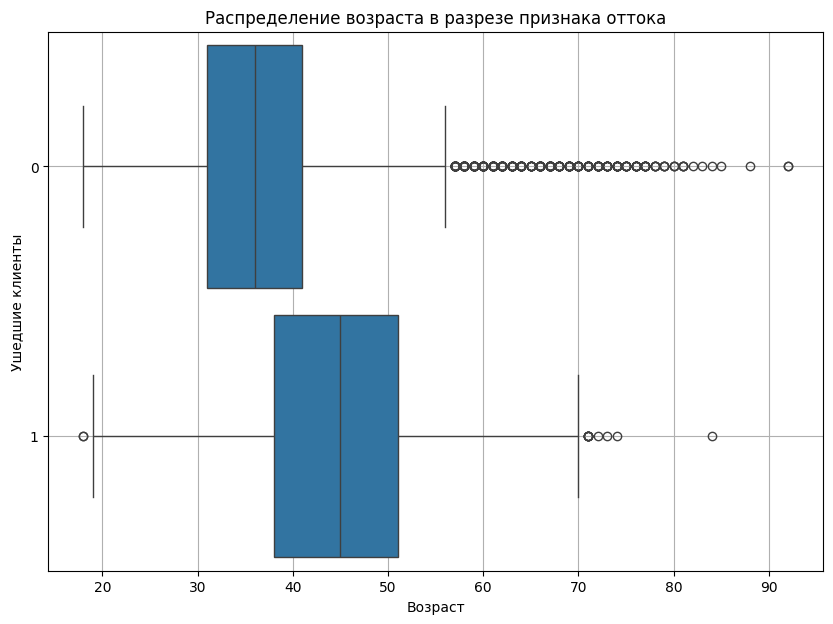

In [7]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9
)

boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Ушедшие клиенты');
boxplot.grid()



#### Description
В группе лояльных клиентов значительно больше выбросов.   
Банку стоит обратить внимание на возрастную категорию 40+, поскольку именно возрастные клиенты чаще отказываются от услуг данного банка.

### Задание 9.5.
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента (*CreditScore*) и его предполагаемой зарплаты (*EstimatedSalary*). Добавьте расцветку по признаку оттока клиентов.   
Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

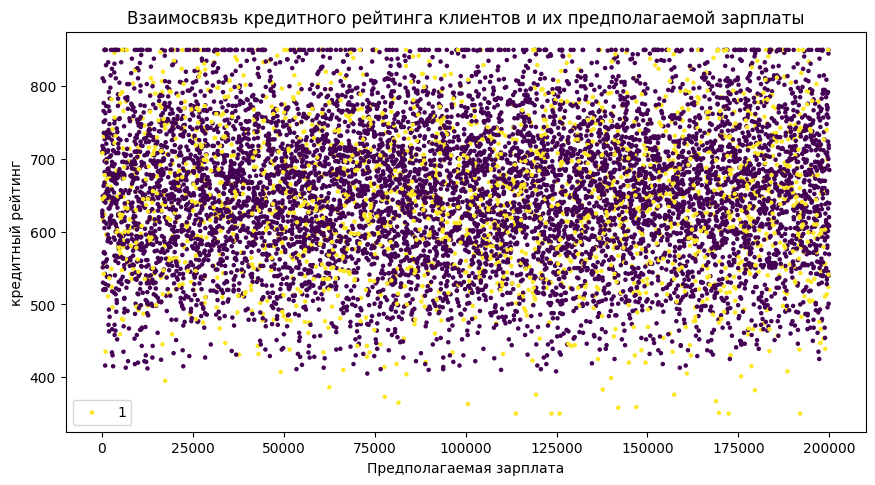

In [8]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=churn_df['EstimatedSalary'],
    y=churn_df['CreditScore'],
    s=5,
    marker='o',
    c = churn_df['Exited']
);

axes.set_title('Взаимосвязь кредитного рейтинга клиентов и их предполагаемой зарплаты');
axes.set_xlabel('Предполагаемая зарплата');
axes.set_ylabel('кредитный рейтинг');
axes.legend(churn_df['Exited']);


#### Description
Как видно из графика явной взимосвязи между кредитным рейтингом и предполагаемой зарплаты не прослеживается, однако можем видеть, что только у ушедших клинтов кредитный рейтинг ниже 400.

### Задание 9.6.
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.


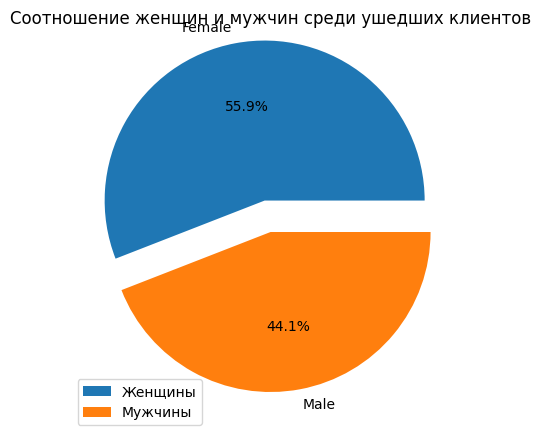

In [9]:
exited_cl = churn_df[churn_df['Exited']==1]

exited_count = exited_cl['Gender'].value_counts()

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_count,
    labels=exited_count.index,
    autopct='%.1f%%',
    explode = [0.2, 0],
);
axes.set_title('Cоотношение женщин и мужчин среди ушедших клиентов')
axes.legend(['Женщины', 'Мужчины']);



#### Description
Не многим чаще из банка уходят женщины - 56% от всех ушедших клиентов.

### Задание 9.7.
Как отток клиентов зависит от числа приобретённых у банка услуг (*NumOfProducts*) ? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [10]:
churn_df['loyal'] = 1-churn_df['Exited']
group_exit = churn_df.groupby(['NumOfProducts'])[['loyal', 'Exited']].sum()

fig = px.bar(
    data_frame=group_exit,
    x=group_exit.index,
    y=['Exited', 'loyal'],
    barmode='group',
    orientation='v',
    height=450, #высота
    width=900, #ширина
    title='Зависимость',
    
)
fig.show()

#### Description
Из графика видно, что чем меньше клиент пользовался услугами банка, тем выше вероятность что он уйдет. Большинство ушедших клиентов пользовались не более одной услугой.

### Задание 9.8.
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [12]:
churn_98 = churn_df.copy()

churn_98['IsActiveMember'] = churn_98['IsActiveMember'].map(lambda x: 'Inactive' if x == 0 else 'Active')
group_active = churn_98.groupby(['IsActiveMember'])[['loyal', 'Exited']].sum()

fig = px.bar(
    data_frame=group_active,
    x=group_active.index,
    y=['Exited', 'loyal'],
    barmode='group',
    orientation='v',
    height=450, #высота
    width=900, #ширина
    title='Зависимость',
    
)
fig.show()


#### Description
Из графика видно, что кол-во ушедших не активных клиентов сильно больше чем активных. Банку следует поднимать уровень активности клиентов.

### Задание 9.9.
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [35]:
# Группируем данные взяв среднее по странам
choropleth_df = churn_data.groupby(['Geography'])['Exited'].mean().reset_index()

# Строим график
fig = px.choropleth(
    data_frame=choropleth_df, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    title='Сохранность клиентов в зависимости от страны', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='tempo' #палитра цветов
)

#отображаем график
fig.show()

#### Description
Наибольшая доля ушедших клиентов в Германии. Возможно это связано с высокой конкуренцией в банковской сфере внутри страны.

### Задание 9.10.
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.   
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).    
В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

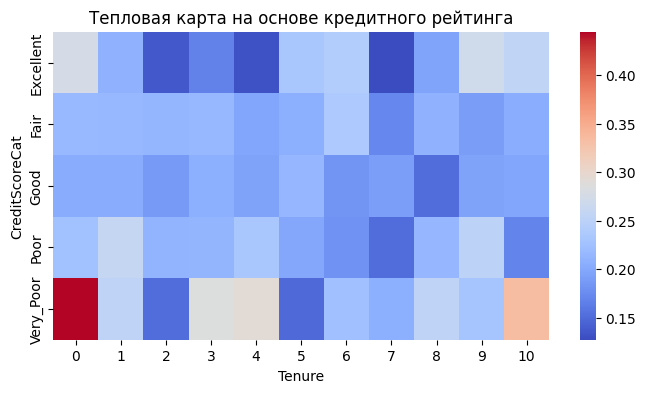

In [44]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(
    data=pivot,
    cmap='coolwarm'
)
heatmap.set_title('Тепловая карта на основе кредитного рейтинга')

plt.show()

#### Description
Чаще всего уходят очень бедные клиенты, которые пользовались услугами банка менее года. На втором месте -  очень бедные клиенты, которые пользовались услугами банка больше 9 лет